In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
del df["id"]
del df["date"]

In [5]:
import numpy as np
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(df)
print(pca.explained_variance_ratio_)

[0.98219606 0.01572275]


In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0).fit(X)
labels=kmeans.predict(X)
print(labels)

label_list=list(labels)

print(label_list.count(0),label_list.count(0))

[1 1 1 ... 1 1 1]
1782 1782


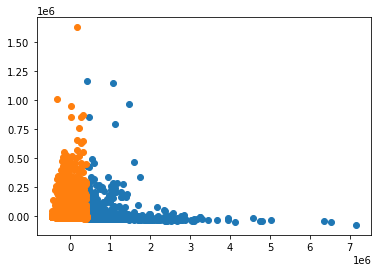

In [9]:
import matplotlib.pyplot as plt
first=X[labels==0]
second=X[labels==1]

plt.scatter(first[:,0],first[:,1])
plt.scatter(second[:,0],second[:,1])
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=0).fit(X)
labels=kmeans.predict(X)
print(labels)

label_list=list(labels)

print(label_list.count(0),label_list.count(0))

[0 2 0 ... 0 0 0]
12933 12933


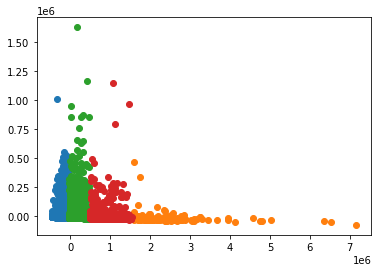

In [11]:
import matplotlib.pyplot as plt
first=X[labels==0]
second=X[labels==1]
third=X[labels==2]
forth=X[labels==3]


plt.scatter(first[:,0],first[:,1])
plt.scatter(second[:,0],second[:,1])
plt.scatter(third[:,0],third[:,1])
plt.scatter(forth[:,0],forth[:,1])

plt.show()

In [33]:
#DB Scan --en iyisi
#eps==epsilon-->çizeceğimiz çemberin çapı.
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=7000,min_samples=100).fit(X)
print(clustering.labels_)

[0 0 0 ... 0 0 0]


In [34]:
cluster_list=list(clustering.labels_)
unique=list(set(cluster_list))
print(len(unique))

print(-1,cluster_list.count(-1))
for i in range(len(unique)):
    print(i,cluster_list.count(i))





#print(cluster_list.count(0),cluster_list.count(1),cluster_list.count(2),cluster_list.count(3))

5
-1 4828
0 16434
1 200
2 116
3 35
4 0


In [1]:
#ikinci dataseti
import pandas as pd
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
del df["CUST_ID"]

In [4]:
mean=df["MINIMUM_PAYMENTS"].mean()
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(mean)
df.fillna(0,inplace=True)

In [5]:
from sklearn.cluster import KMeans
mdl=KMeans(n_clusters=2,max_iter=20).fit(df)
print(mdl.cluster_centers_) 

[[3.83054411e+03 9.39852278e-01 2.36588646e+03 1.55241827e+03
  8.13851142e+02 2.59079669e+03 5.57884606e-01 3.46217213e-01
  4.06122866e-01 2.27355179e-01 6.57550597e+00 2.80062273e+01
  9.81266453e+03 4.29423717e+03 1.76365367e+03 1.49459308e-01
  1.17384536e+01]
 [9.42701297e+02 8.60099339e-01 6.29306571e+02 3.29033812e+02
  3.00550231e+02 5.36584257e+02 4.71820272e-01 1.63012345e-01
  3.52999494e-01 1.09842968e-01 2.33603873e+00 1.10615122e+01
  3.03457548e+03 1.03042040e+03 6.17412493e+02 1.54882247e-01
  1.14566425e+01]]


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit(df))
print(scaler.transform(df))
columns=df.columns
df=scaler.transform(df)
df=pd.DataFrame(df)
df.columns

StandardScaler()
[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


RangeIndex(start=0, stop=17, step=1)

In [43]:
print(df)

            0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        1

In [7]:
model=KMeans(n_clusters=2,max_iter=20).fit(df)
print(model.cluster_centers_)

[[-0.08803012  0.28892876  0.47905743  0.33162027  0.5231979  -0.25592398
   1.03466799  0.5362409   0.92255625 -0.38171051 -0.26786572  0.64356759
   0.16806023  0.15795938  0.00422535  0.39950506  0.12025057]
 [ 0.06244154 -0.20494298 -0.33980506 -0.23522492 -0.37111479  0.18153202
  -0.7339108  -0.38036644 -0.65438768  0.27075494  0.19000253 -0.45649542
  -0.1192085  -0.11204376 -0.00299713 -0.28337697 -0.08529614]]


In [45]:
from sklearn.manifold import TSNE
df_embedded=TSNE(n_components=2,learning_rate="auto",init="random").fit_transform(df)
df_embedded.shape



UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
k_model=KMeans(n_clusters=4,max_iter=10).fit(df_embedded)
model_pred=k_model.predict(df_embedded)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

df["tsne-2d-one"]=df_embedded[:,0]
df["tsne-2d-two"]=df_embedded[:,1]
df["y"]=model_pred

plt.figure(figsize=(16,20))
sns.scatterplot(x="tsne-2d-one",y="tsne-2d-two",hue="y",palette=sns.color_palette("hls",3),
data=df,legend="full",alpha=0.3)

NameError: name 'df_embedded' is not defined